In [1]:
import numpy as np
import pandas as pd
import math
import statistics as stats
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import norm

# Estatística Descritiva

- Primeiramente, importamos o dataset com a organização dos dados por DIAS. Adicionamos a coluna organizada por ano para observar melhor os dados.

In [3]:
btc_dataset = pd.read_csv('Poloniex_BTCUSDC_d.csv', skiprows=1, parse_dates=['date'])
btc_dataset.drop(columns='unix', inplace=True)
btc_dataset.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USDC
0,2022-07-31,BTC/USDC,23631.647504,23761.620475,23545.739397,23719.583576,3.176313e+04,1.342978
1,2022-07-30,BTC/USDC,23795.133823,24661.013634,23500.000000,23645.665322,2.137218e+06,88.572925
2,2022-07-29,BTC/USDC,23852.254868,24444.000000,23448.625662,23774.368186,2.475382e+06,103.577541
3,2022-07-28,BTC/USDC,22972.588882,24210.140953,22643.084928,23856.203587,2.131011e+06,91.770726
4,2022-07-27,BTC/USDC,21272.485744,23100.000000,21048.234917,22961.245747,1.768529e+06,79.871174


In [4]:
btc_dataset['year'] = btc_dataset['date'].dt.year
btc_dataset.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USDC,year
0,2022-07-31,BTC/USDC,23631.647504,23761.620475,23545.739397,23719.583576,3.176313e+04,1.342978,2022
1,2022-07-30,BTC/USDC,23795.133823,24661.013634,23500.000000,23645.665322,2.137218e+06,88.572925,2022
2,2022-07-29,BTC/USDC,23852.254868,24444.000000,23448.625662,23774.368186,2.475382e+06,103.577541,2022
3,2022-07-28,BTC/USDC,22972.588882,24210.140953,22643.084928,23856.203587,2.131011e+06,91.770726,2022
4,2022-07-27,BTC/USDC,21272.485744,23100.000000,21048.234917,22961.245747,1.768529e+06,79.871174,2022


- A principio, vamos observar a variável do "fechamento", organizadas por ano.

In [5]:
fig=px.box(data_frame=btc_dataset, y='close', x='year', color='year')

fig.update_layout(
    title='VARIAÇÃO DO FECHAMENTO - BTC/USDC',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

- Podemos observar uma concentração maior/mais variação de outliers no ano de 2020, então resolvemos observar esses dados mais de perto para avaliar melhor esses outliers. Levantamos os seguintes questionamentos: esses valores são anomalias? Seriam eles fruto de algum "dump and pump" (prática que envolve inflar artificialmente o preço inserindo dinheiro e depois tirando rapidamente)? Ou são valores reais mesmo?

In [6]:
fig=px.line(data_frame=btc_dataset[btc_dataset['year']==2020], y='close', x='date', color='year')

fig.update_layout(
    title='Variação do Fechamento - 2020',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

- Observando a variação do fechamento dia a dia durante o ano de 2020, não podemos observar nenhuma evidência de práticas de "pump and dump" ou valores anomolos resultantes de erros de inserção de dados. O que observamos é realmente um crescimendo no valor do fechamento durante o ano de 2020. Por isso, concluimos que esses dados devem ser mantidos.

- Depois decidimos observar a variação no volume de BTC negociado, também organizado por ano.

In [7]:
fig=px.box(data_frame=btc_dataset, y='Volume BTC', x='year', color='year')

fig.update_layout(
    title='VARIAÇÃO DO VOLUME - BTC/USDC',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

- Logo de cara, o que chamou nossa atenção foi o valor discrepante no máximo de 2021. Então, também decidimos observar esse valor de perto, para ter certeza que esse valor também não é fruto de algum erro na inserção de dados.

In [15]:
fig=px.line(data_frame=btc_dataset[btc_dataset['year']==2021], y='Volume BTC', x='date', color='year')

fig.update_layout(
    title='Variação Volume - 2021',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

- Com o gráfico de linhas focado no ano, podemos observar que a possível anomalia aconteceu em maio, mais especificamente no dia 19 de maio, mas ainda fica dificil distinguir o que realmente aconteceu. Por isso, resolvemos pegar o outro dataset disponível no site, que organiza os dados em um intervalo de hora em hora.

In [16]:
btc_dataset_hora = pd.read_csv('Poloniex_BTCUSDC_1h.csv', skiprows=1, parse_dates=['date'])
btc_dataset_hora.drop(columns='unix', inplace=True)

In [17]:
btc_dataset_hora['year'] = btc_dataset_hora['date'].dt.year
btc_dataset_hora.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USDC,year
0,2022-07-31 01:00:00,BTC/USDC,23750.558747,23751.746164,23703.877009,23719.583576,4438.147502,0.187043,2022
1,2022-07-31 00:30:00,BTC/USDC,23668.742550,23761.620475,23661.164532,23757.142858,11194.919103,0.471548,2022
2,2022-07-31 00:00:00,BTC/USDC,23631.647504,23699.423626,23545.739397,23668.742550,16130.064947,0.684387,2022
3,2022-07-30 23:30:00,BTC/USDC,23560.198121,23662.974411,23560.198121,23645.665322,1490.858574,0.063228,2022
4,2022-07-30 23:00:00,BTC/USDC,23689.478250,23738.880032,23562.341240,23594.398784,826.181940,0.034931,2022


In [18]:
btc_dataset_hora['specific date'] = btc_dataset_hora['date'].dt.date
btc_dataset_hora['specific date'] = btc_dataset_hora['specific date'].astype(str)
btc_dataset_hora.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47976 entries, 0 to 47975
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           47976 non-null  datetime64[ns]
 1   symbol         47976 non-null  object        
 2   open           47976 non-null  float64       
 3   high           47976 non-null  float64       
 4   low            47976 non-null  float64       
 5   close          47976 non-null  float64       
 6   Volume BTC     47976 non-null  float64       
 7   Volume USDC    47976 non-null  float64       
 8   year           47976 non-null  int64         
 9   specific date  47976 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 3.7+ MB


In [20]:
fig=px.line(data_frame=btc_dataset_hora[btc_dataset_hora['specific date']=='2021-05-19'], y='Volume BTC', x='date', color='year')

fig.update_layout(
    title='Variação Volume - 2021-05-19',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

In [25]:
btc_dataset_hora[btc_dataset_hora['specific date']=='2021-05-19']['Volume BTC'].sum()

81964199.9649796

In [23]:
fig=px.line(data_frame=btc_dataset_hora[btc_dataset_hora['specific date']=='2021-05-19'], y='close', x='date', color='year')

fig.update_layout(
    title='Fechamento - 2021-05-19',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

- Mais uma vez, não podemos encontrar nenhum evidência de que os dados estejam de alguma forma incorretos, então concluimos que deve ser mantido.

- Achamos interessante adicionar um delta do valor máximo e do valor mínimo de cada dia, já que er auma informação que não constava. Também adicionamos para mais uma variável na tabela de correlação.

In [27]:
btc_dataset['delta'] = btc_dataset['high'] - btc_dataset['low']

btc_dataset.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USDC,year,delta
0,2022-07-31,BTC/USDC,23631.647504,23761.620475,23545.739397,23719.583576,3.176313e+04,1.342978,2022,215.881078
1,2022-07-30,BTC/USDC,23795.133823,24661.013634,23500.000000,23645.665322,2.137218e+06,88.572925,2022,1161.013634
2,2022-07-29,BTC/USDC,23852.254868,24444.000000,23448.625662,23774.368186,2.475382e+06,103.577541,2022,995.374338
3,2022-07-28,BTC/USDC,22972.588882,24210.140953,22643.084928,23856.203587,2.131011e+06,91.770726,2022,1567.056025
4,2022-07-27,BTC/USDC,21272.485744,23100.000000,21048.234917,22961.245747,1.768529e+06,79.871174,2022,2051.765083


<AxesSubplot:>

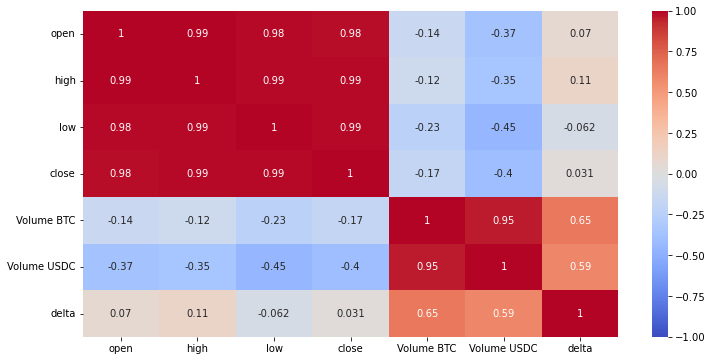

In [28]:
btc_dataset_correlacao = btc_dataset[btc_dataset['year']==2021].drop(columns='year').corr()

plt.figure(figsize=(12,6))

sns.heatmap(btc_dataset_correlacao, annot=True, vmin=-1, vmax=1, cmap='coolwarm')

- Adicionamos o delta pois a principio levantamos a hipotese de a diferença do valor máximo e valor mínimo (delta) estar relacionada com o valume comercializado no dia. Porém, ao observarmos a tabela de correlação, não podemos afirmar com certeza se há ou não, pois embora seja demonstrada uma correlação de 65%, pode haver ruído nos dados. Seria necessario fazer um estudo mais a fundo para determinar o que realmente está correlacionado. 
- É importante ressaltar que a alta de taxa de correlação entre os dados de abertura, máxima, mínima e fechamento podem estar relacionada com os fatos de que:
As oscilações diarias acabam não sendo tão grandes por causa dos valores altos;
O valor de abertura é bem próximo ao valor de fechamento pois um sucede o outro.

In [29]:
btc_dataset[btc_dataset['year']==2021].describe()

,open,high,low,close,Volume BTC,Volume USDC,year,delta
count,365.000000,365.000000,365.000000,365.000000,3.650000e+02,365.000000,365.0,365.000000
mean,47378.256432,48800.993615,45716.144672,47423.202145,1.245023e+07,283.176884,2021.0,3084.848943
std,9826.230879,9824.410586,9784.133484,9776.534514,9.531012e+06,244.067330,0.0,1683.866342
min,28939.016219,29688.700013,28000.000000,29382.652722,1.545689e+06,29.912819,2021.0,780.437941
25%,38213.267797,39766.723489,36200.000000,38329.071002,5.521954e+06,115.503178,2021.0,1970.704006
50%,47850.370460,49234.808808,46582.693875,47827.526938,9.635082e+06,209.793330,2021.0,2728.221583
75%,56281.677146,57735.115685,54019.560203,56286.023442,1.696789e+07,381.467060,2021.0,3620.000000
max,67534.243288,69000.000000,66318.209901,67562.580742,8.196420e+07,2141.153853,2021.0,13468.725508


- Gráficos mostrando a frequência de valores dos últimos quatro anos.

(array([532., 233.,  72.,  29.,  88., 139., 122.,  67.,  81.,  29.]),
 array([ 3180.        ,  9615.42432884, 16050.84865768, 22486.27298652,
        28921.69731536, 35357.1216442 , 41792.54597305, 48227.97030189,
        54663.39463073, 61098.81895957, 67534.24328841]),
 <BarContainer object of 10 artists>)

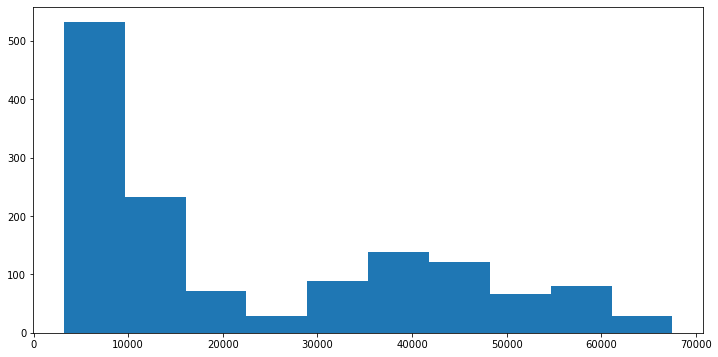

In [30]:
plt.figure(figsize=(12,6))
plt.hist(btc_dataset['open'])

(array([531., 233.,  72.,  31.,  87., 139., 122.,  67.,  81.,  29.]),
 array([ 3180.        ,  9618.25807425, 16056.5161485 , 22494.77422275,
        28933.032297  , 35371.29037125, 41809.5484455 , 48247.80651975,
        54686.064594  , 61124.32266825, 67562.5807425 ]),
 <BarContainer object of 10 artists>)

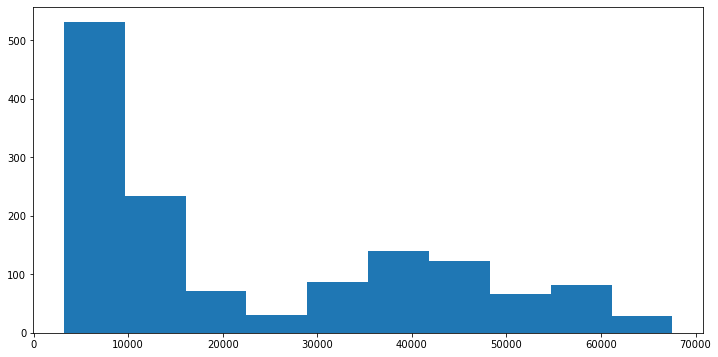

In [31]:
plt.figure(figsize=(12,6))
plt.hist(btc_dataset['close'])

(array([529., 237.,  68.,  33.,  83., 142., 118.,  69.,  84.,  29.]),
 array([ 3229. ,  9806.1, 16383.2, 22960.3, 29537.4, 36114.5, 42691.6,
        49268.7, 55845.8, 62422.9, 69000. ]),
 <BarContainer object of 10 artists>)

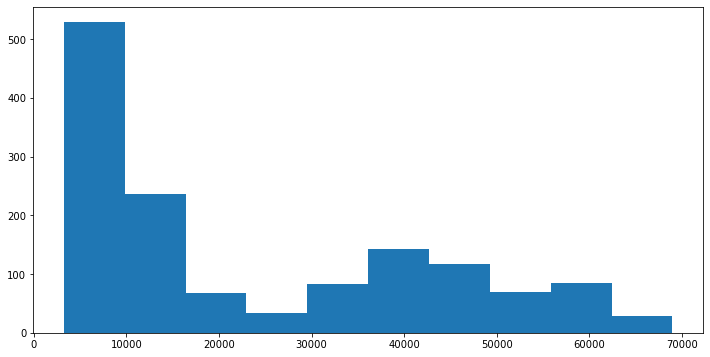

In [32]:
plt.figure(figsize=(12,6))
plt.hist(btc_dataset['high'])

(array([538., 227.,  76.,  28., 105., 127., 133.,  61.,  71.,  26.]),
 array([ 3118.6       ,  9438.56099014, 15758.52198028, 22078.48297042,
        28398.44396056, 34718.4049507 , 41038.36594084, 47358.32693098,
        53678.28792112, 59998.24891126, 66318.2099014 ]),
 <BarContainer object of 10 artists>)

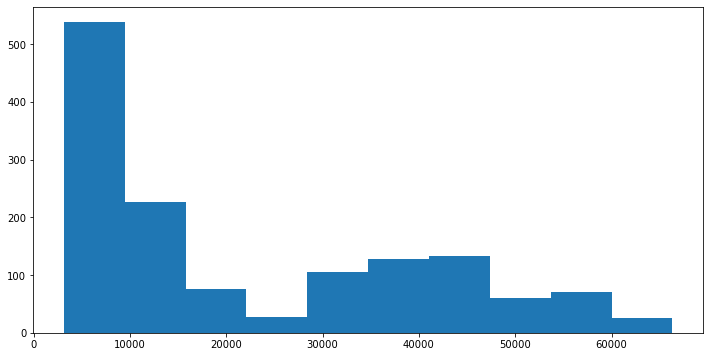

In [33]:
plt.figure(figsize=(12,6))
plt.hist(btc_dataset['low'])

### Probabilidade e Inferência

Parte 2 <br>
Iremos testar se os nossos dados pertencem a uma distribuição exponencial, normal, lognormal ou gamma.

In [2]:
np_array = np.load('values_squad3.npy')
df_base = pd.DataFrame(np_array, columns=['valores'])

In [3]:
mean_ = float(np.mean(df_base,axis=0))
std_ = float(np.std(df_base,axis=0))
IC1 = mean_ + std_
IC2 = mean_ - std_

print('Para um intervalo de confiança de 68% nossos valores estariam entre {}{} e {}{} com uma média de{}{}{}.'.format('\033[91m', round(IC1,4), round(IC2,4),'\033[0m', '\033[1m', round(mean_,7),'\033[0m'))
print('Para um intervalo de confiança de 95% nossos valores estariam entre {}{} e {}{} com uma média de{}{}{}.'.format('\033[91m', round(IC1+std_,4), round(IC2-std_,4),'\033[0m', '\033[1m', round(mean_,7),'\033[0m'))
print('Para um intervalo de confiança de 99.7% nossos valores estariam entre {}{} e {}{} com uma média de{}{}{}.'.format('\033[91m', round(IC1+2*std_,4), round(IC2-2*std_,4),'\033[0m','\033[1m', round(mean_,7),'\033[0m'))


Para um intervalo de confiança de 68% nossos valores estariam entre 0.0996 e -0.0996 com uma média de-8.4e-06.
Para um intervalo de confiança de 95% nossos valores estariam entre 0.1992 e -0.1992 com uma média de-8.4e-06.
Para um intervalo de confiança de 99.7% nossos valores estariam entre 0.2988 e -0.2988 com uma média de-8.4e-06.


In [4]:
def agrupamento(np_array, step, sort_array= False):
    if sort_array == True:
        np_array = np.sort(np_array)
    lista_media_aleatoria = []
    for i in range(step,len(np_array)+1, step):
        agrupamento = np_array[i-step:i]
        media_agrupamentos = np.mean(agrupamento)
        lista_media_aleatoria.append(media_agrupamentos)

    return pd.DataFrame(lista_media_aleatoria, columns=['médias agrupamento'])

In [5]:
#analisando os dados em ordem crescente
df_lista_media_sorted = agrupamento(np_array, 1, True)

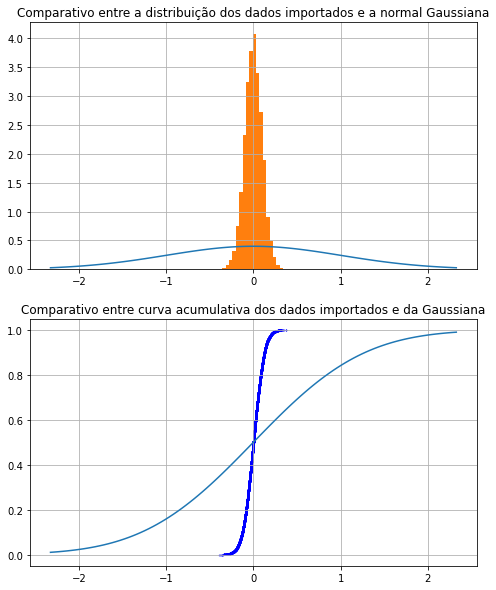

In [6]:
normal_variable = norm()
normal_values = normal_variable.rvs(size=100000)
x = np.linspace(normal_variable.ppf(0.01), normal_variable.ppf(0.99), 100)

fig, (axs1,axs2) = plt.subplots(2,1, figsize=(8,10))
axs1.plot(x, normal_variable.pdf(x))
axs1.hist(df_base, density=True, bins=20)
axs2.scatter(df_lista_media_sorted,df_lista_media_sorted.index/len(df_lista_media_sorted), s=0.5, c='b');
axs2.plot(x, normal_variable.cdf(x));
axs1.grid()
axs2.grid()
axs1.set_title('Comparativo entre a distribuição dos dados importados e a normal Gaussiana')
axs2.set_title('Comparativo entre curva acumulativa dos dados importados e da Gaussiana');
#leptocúrtica simétrica

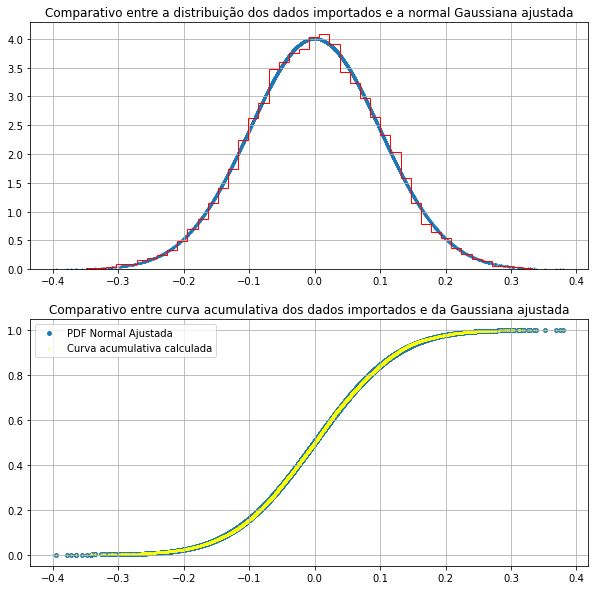

In [7]:
fig, (axs2,axs1) = plt.subplots(2,1, figsize=(10,10))
axs1.scatter(np_array, norm.cdf(np_array, loc = mean_, scale=std_), s=15); # cumulative density function
axs1.scatter(df_lista_media_sorted,df_lista_media_sorted.index/len(df_lista_media_sorted), s=1, c='yellow')
axs2.scatter(np_array, norm.pdf(np_array, loc = mean_, scale=std_), s=1); # probability density function
axs2.hist(df_lista_media_sorted, density=True, bins=50, histtype='step', color='red')
axs1.grid()
axs2.grid()
axs1.set_title('Comparativo entre curva acumulativa dos dados importados e da Gaussiana ajustada')
axs2.set_title('Comparativo entre a distribuição dos dados importados e a normal Gaussiana ajustada')
axs1.legend(['PDF Normal Ajustada', 'Curva acumulativa calculada']);


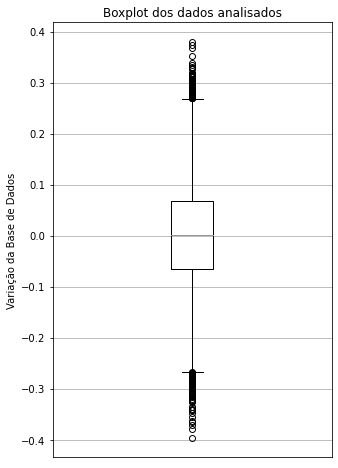

In [8]:
plt.figure(figsize=(5,8))
plt.boxplot(np_array)
plt.xlabel('')
plt.title('Boxplot dos dados analisados')
plt.ylabel('Variação da Base de Dados');
plt.xticks([])
plt.grid()

In [9]:
df_base.describe()

,valores
count,20000.000000
mean,-0.000008
std,0.099599
min,-0.395677
25%,-0.066225
50%,0.000454
75%,0.067889
max,0.379186


In [10]:
#analisando os dados em ordem aleatória
df_lista_media_aleatoria1 = agrupamento(np_array,4) 
df_lista_media_aleatoria2 = agrupamento(np_array,16) 
df_lista_media_aleatoria3 = agrupamento(np_array,64) 

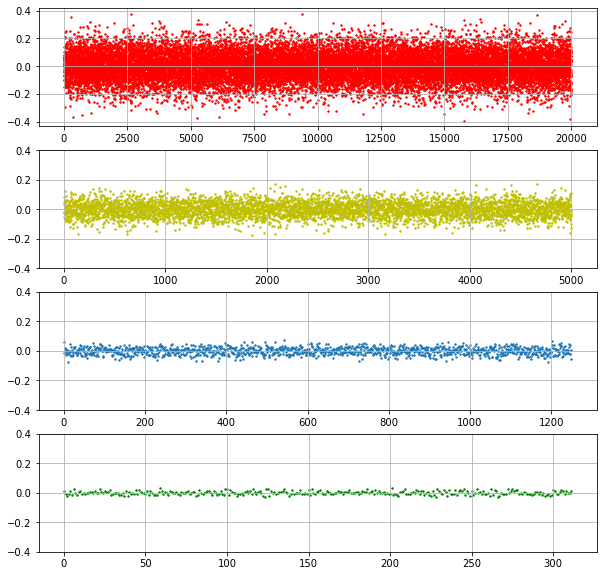

In [11]:
fig, (axs1,axs2,axs3,axs4) = plt.subplots(4,1, figsize=(10,10))
axs1.scatter(df_base.index, df_base, s=2, c='r')
axs2.scatter(df_lista_media_aleatoria1.index, df_lista_media_aleatoria1.values, s=2,c='y')
axs3.scatter(df_lista_media_aleatoria2.index, df_lista_media_aleatoria2.values, s=2)
axs4.scatter(df_lista_media_aleatoria3.index, df_lista_media_aleatoria3.values, s=2, c='g')
axs2.set_ylim(-0.4,0.4)
axs3.set_ylim(-0.4,0.4)
axs4.set_ylim(-0.4,0.4);
axs1.grid()
axs2.grid()
axs3.grid()
axs4.grid()

In [12]:
def forecast_constant(loc, n, scale=1.0):
  return loc + np.random.normal(loc, scale, n)

In [13]:
X_forecast = [] 
np_forecast = np.array(forecast_constant(mean_, len(df_base), std_ ))
df_forecast = pd.DataFrame(np_forecast.T)
mean_tests = np.mean(np_forecast,axis=0)
std_tests = np.std(np_forecast,axis=0)

conf_tests = 1.96*std_/np.sqrt(1000)

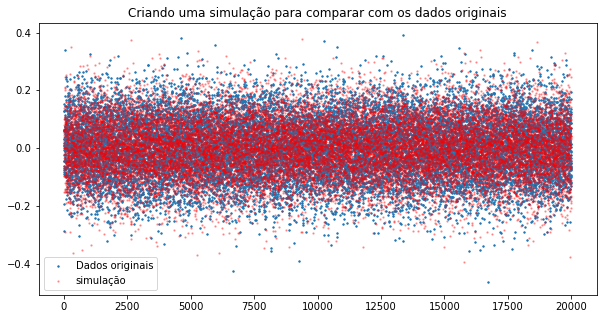

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(df_forecast.index, df_forecast, s=2)
plt.scatter(df_base.index, df_base, s=2, c='r', alpha= 0.3)
plt.title('Criando uma simulação para comparar com os dados originais')
plt.legend(['Dados originais','simulação']);

In [15]:
X_forecast = [] 
for i in range(1000):
  X_forecast.append(forecast_constant(mean_, len(df_base), std_ ))

np_forecast = np.array(X_forecast)
df_forecast = pd.DataFrame(np_forecast.T)
mean_tests = np.mean(np_forecast,axis=0)
std_tests = np.std(np_forecast,axis=0)

conf_tests = 1.96*std_/np.sqrt(1000)

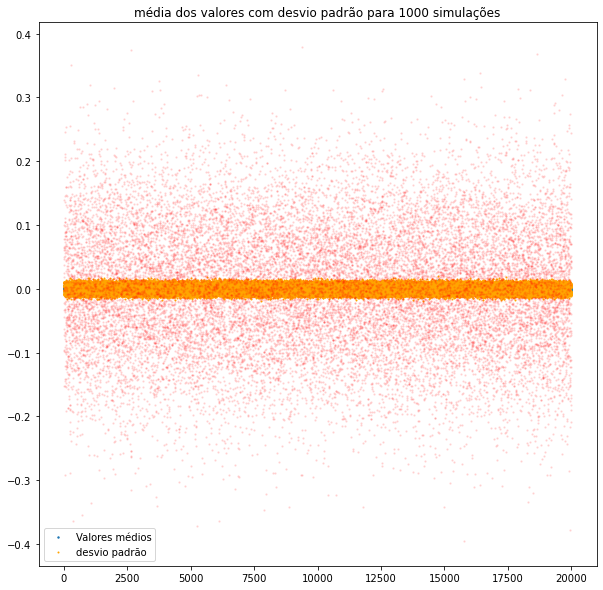

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(pd.DataFrame(mean_tests).index, mean_tests, s= 2) 
plt.scatter(pd.DataFrame(mean_tests).index, mean_tests + conf_tests, s=1,color='orange') 
plt.scatter(pd.DataFrame(mean_tests).index, mean_tests - conf_tests, s=1,color='orange');
plt.scatter(df_base.index, df_base, s=2, c='r', alpha=0.1)
plt.title('média dos valores com desvio padrão para 1000 simulações');
plt.legend(['Valores médios','desvio padrão']);

a) Para cada uma das distribuições, pesquise um estimador para o parâmetro θ. Em seguida,
escreva um código para a estimação desses parâmetros.

b) Faça o teste do qui-quadrado para verificar qual distribuição teórica mais se assemelha à
distribuição dos dados. Não esqueça de montar o teste de hipótese.

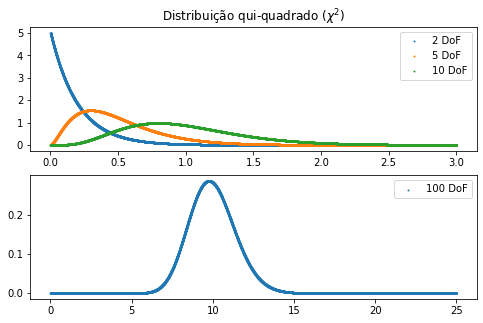

In [20]:
from scipy.stats import chi2
x = np.linspace(0, 3,10000)
y = np.linspace(0, 25,10000)
fig, (axs1, axs2) = plt.subplots(2,1, figsize=(8,5))

axs1.scatter(x, chi2.pdf(x, df=2, loc= mean_, scale=std_), s=1)
axs1.scatter(x, chi2.pdf(x, df=5,loc= mean_, scale=std_), s=1)
axs1.scatter(x, chi2.pdf(x, df=10,loc= mean_, scale=std_), s=1)
axs2.scatter(y, chi2.pdf(y, df=100,loc= mean_, scale=std_), s=1)
axs1.set_title('Distribuição qui-quadrado $(\chi^2)$')
axs1.legend(['2 DoF', '5 DoF', '10 DoF'])
axs2.legend(['100 DoF']);

In [18]:
conf_int_2 = chi2.interval(0.95,df=2,loc= mean_, scale=std_)
conf_int_5 = chi2.interval(0.95,df=5,loc= mean_, scale=std_)
conf_int_10 = chi2.interval(0.95,df=10,loc= mean_, scale=std_)
conf_int_100 = chi2.interval(0.95,df=100,loc= mean_, scale=std_)
print(conf_int_2,'\n', conf_int_5, '\n', conf_int_10, '\n', conf_int_100)

(0.005034755638101604, 0.7347935435402503) 
 (0.08277770755704811, 1.2780690616167574) 
 (0.3233800381840111, 2.0400526331083113) 
 (7.392265717250285, 12.903885595448553)


#### Questão 3
Séries Temporais

Mostre graficamente o comportamento da série temporal. Realce os valores extremos
(mínimo e máximo). Existem registros atípicos?

Quais são os componentes da série temporal? Analise tais componentes e plote os
gráficos.

Os resíduos da série seguem uma distribuição normal?